In [1]:
%autosave 10

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [7]:
classifier

LogisticRegression()

In [8]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [10]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
X = df['LIMIT_BAL'][0:10].values.reshape(-1,1)
X

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [12]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [14]:
new_X = df['LIMIT_BAL'][10:20].values.reshape(-1,1)
new_X

array([[200000],
       [260000],
       [630000],
       [ 70000],
       [250000],
       [ 50000],
       [ 20000],
       [360000],
       [180000],
       [130000]], dtype=int64)

In [15]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

##Generating Synthetic Data

In [17]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

##data for a linear regression

In [18]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

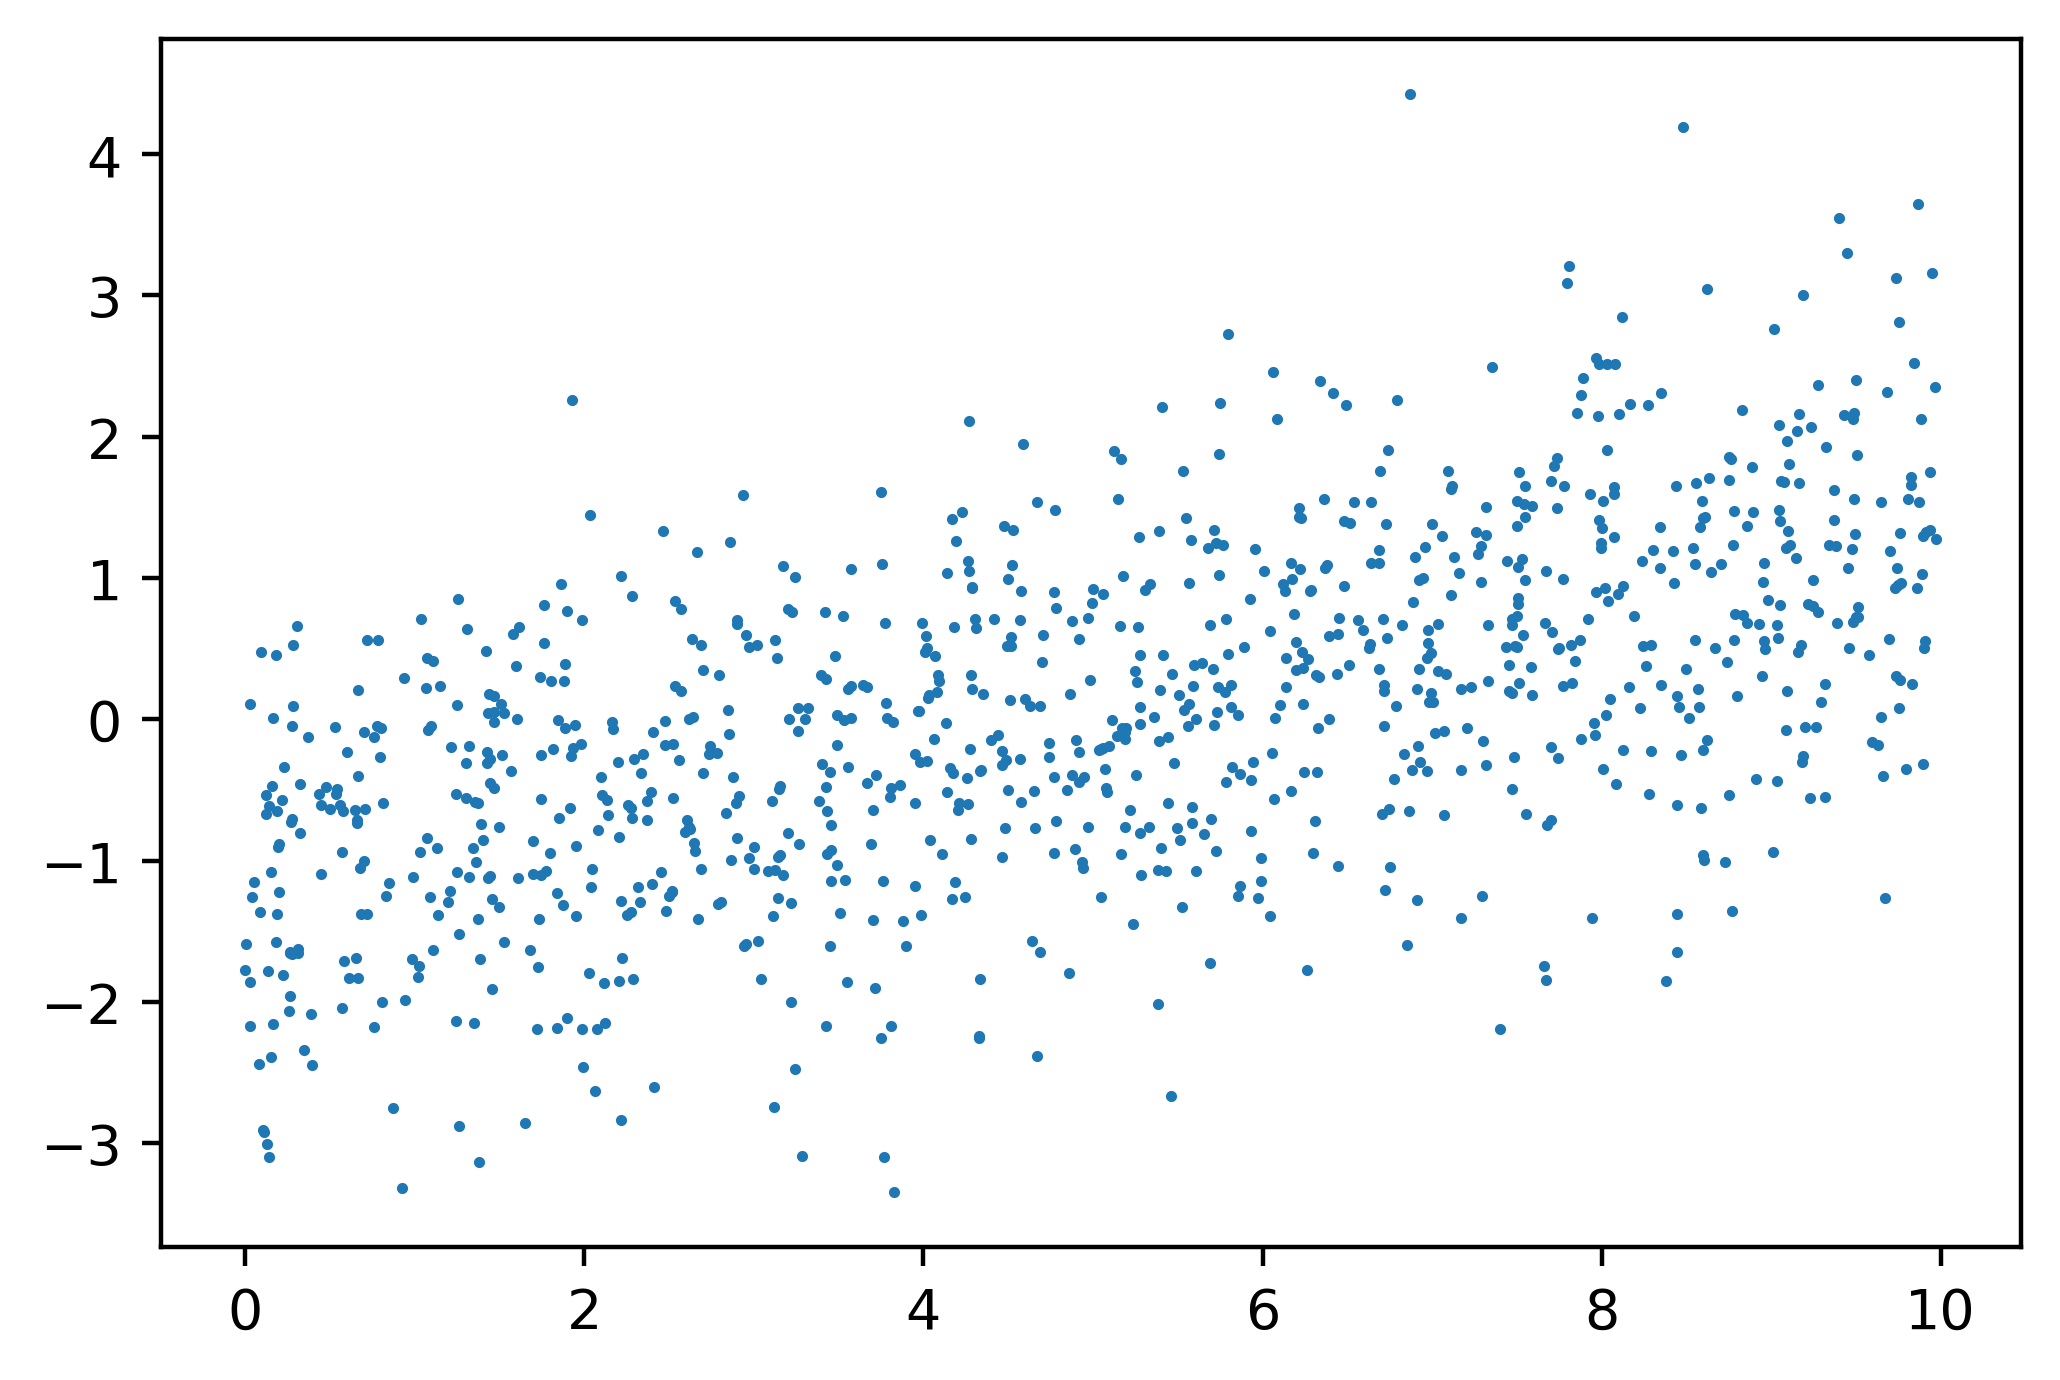

In [19]:
plt.scatter(X,y,s=1)

##Linear Regression in Scikit-Learn

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [21]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [22]:
y_pred = lin_reg.predict(X.reshape(-1,1))

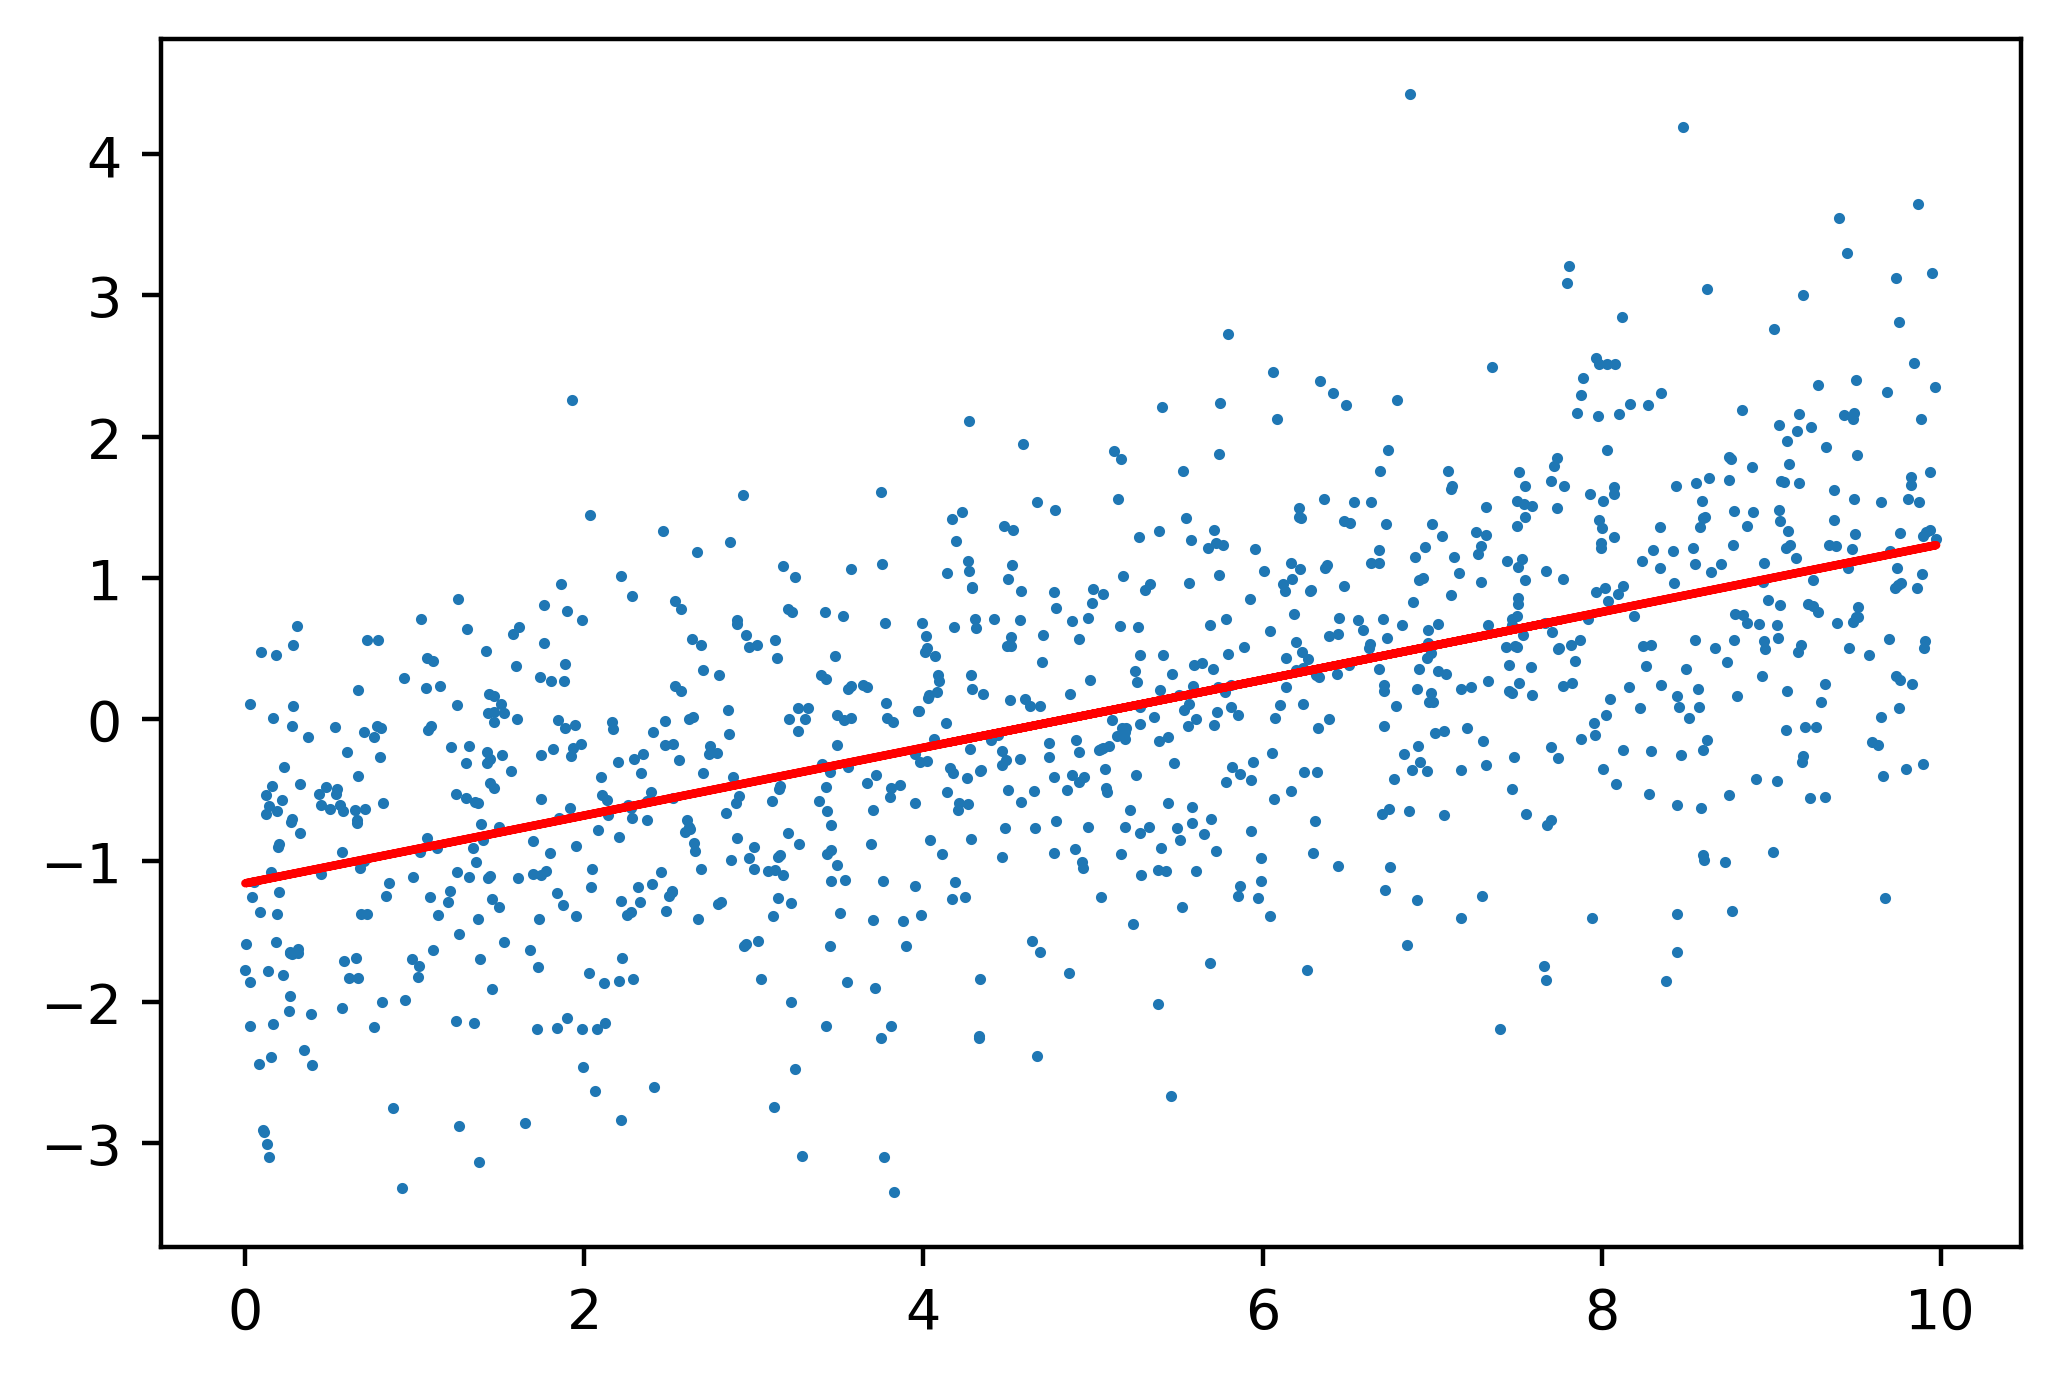

In [23]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

##Splitting the data 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


##Classification Accuracy

In [27]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [28]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
#accuracy
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [31]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

##TPR , FPR , Confusion Matrix

In [32]:
P = sum(y_test)
P

1155

In [33]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [34]:
TPR = TP/P
TPR

0.0

In [35]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [36]:
FNR = FN/P
FNR

1.0

In [37]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [38]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [39]:
#obtaining predicted prob
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [40]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [41]:
prob_sum.shape

(5333,)

In [42]:
np.unique(prob_sum)

array([1.])

In [43]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644178, 0.05409607, 0.10175036, 0.14940464, 0.19705893,
        0.24471322, 0.29236751, 0.34002179, 0.38767608, 0.43533037,
        0.48298465]),
 <a list of 10 Patch objects>)

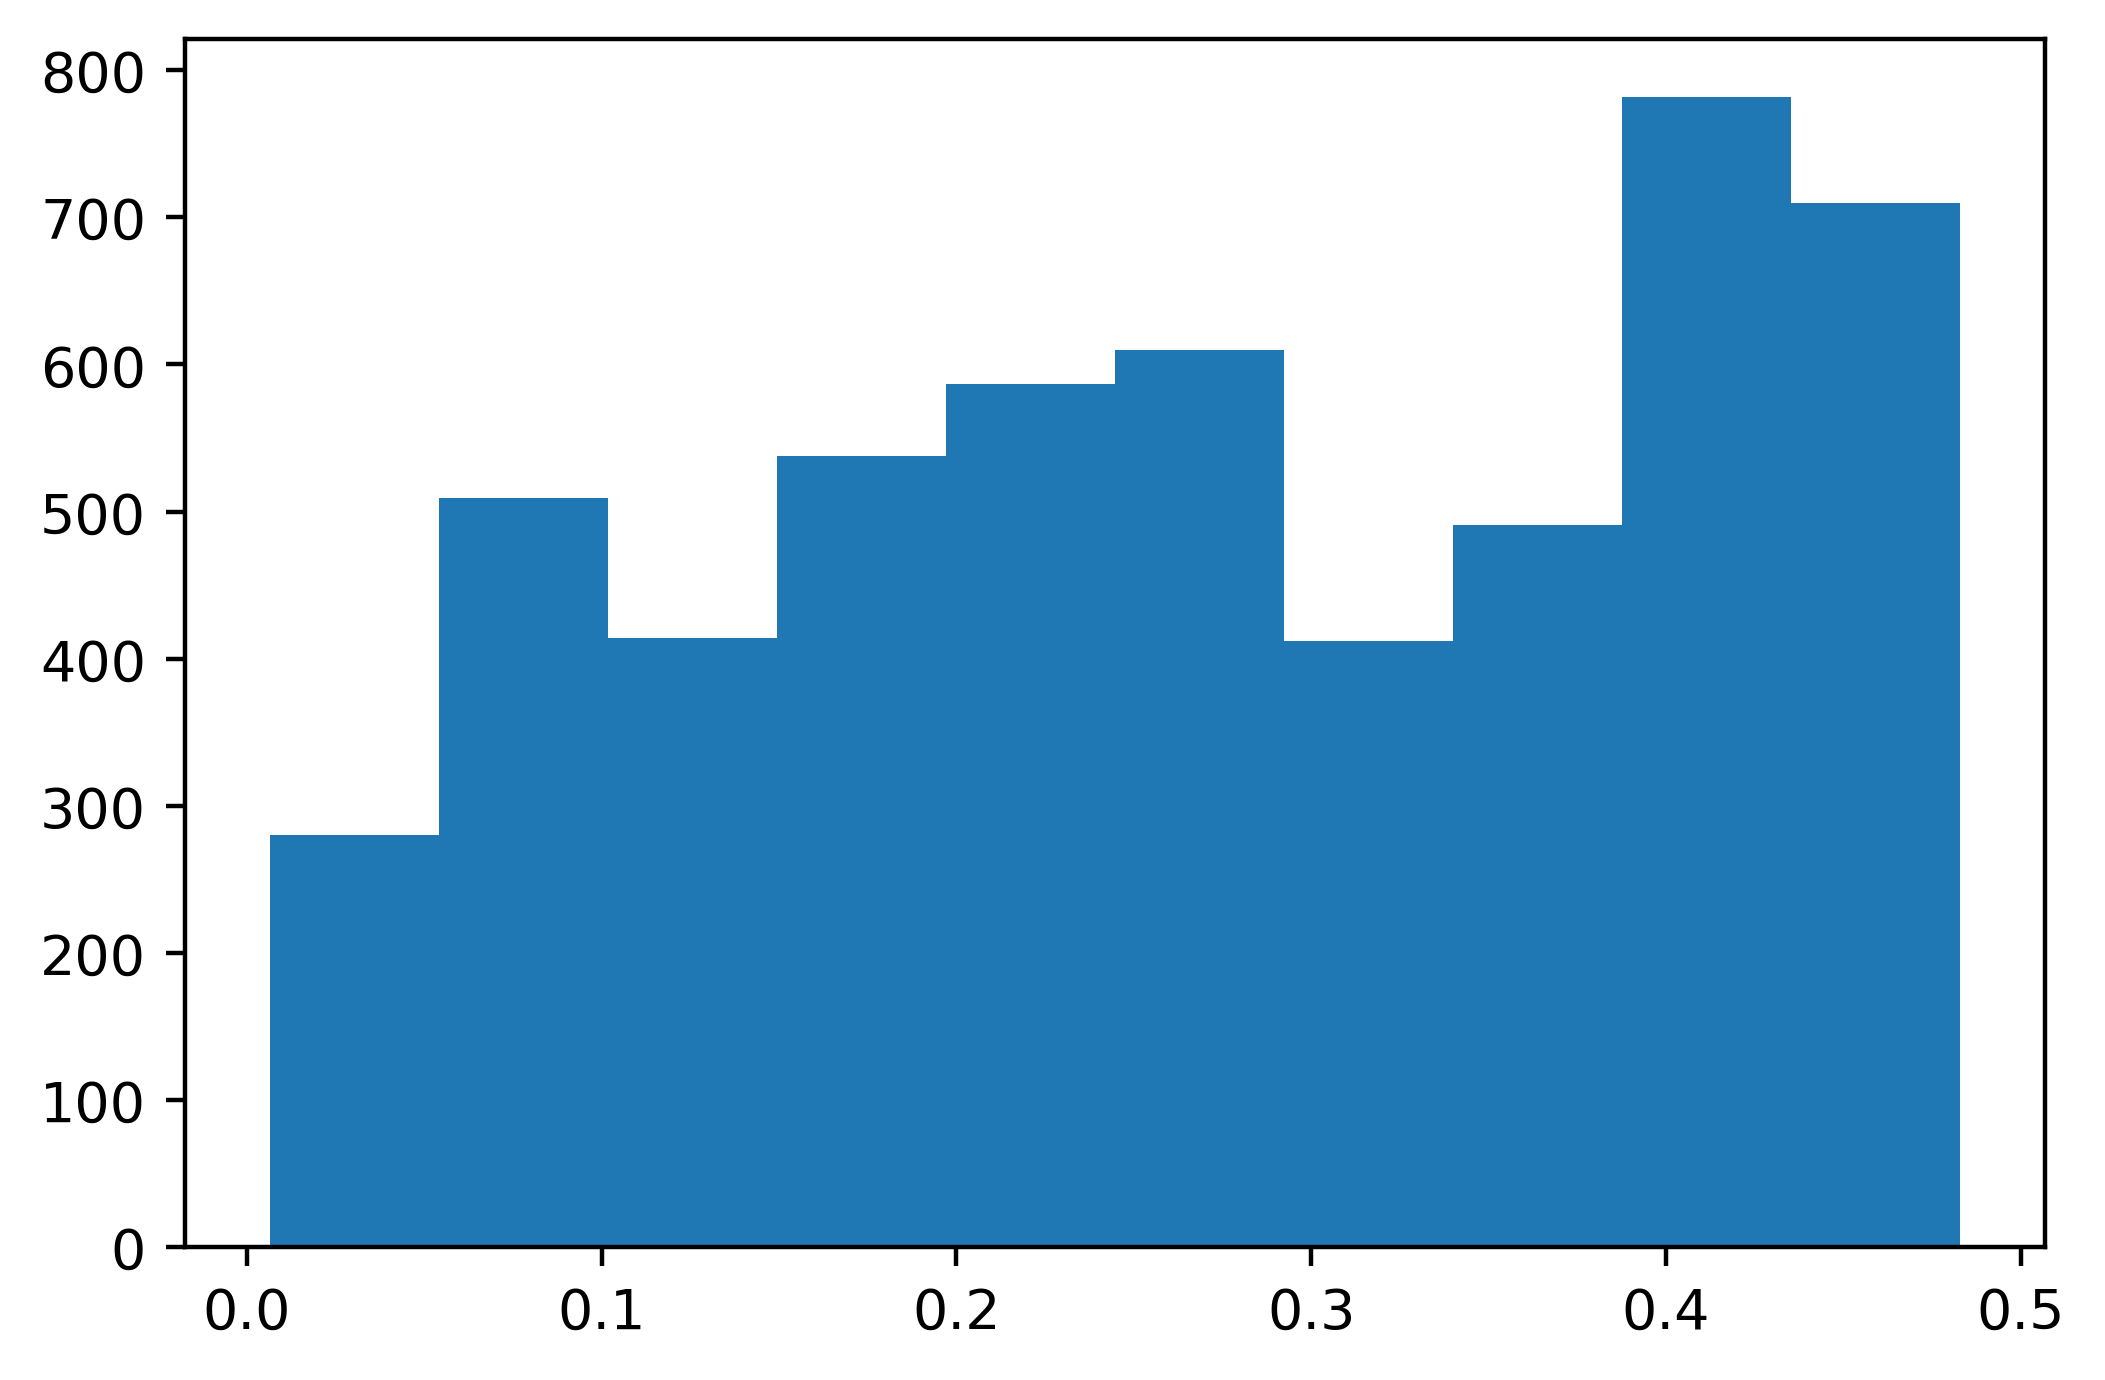

In [44]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

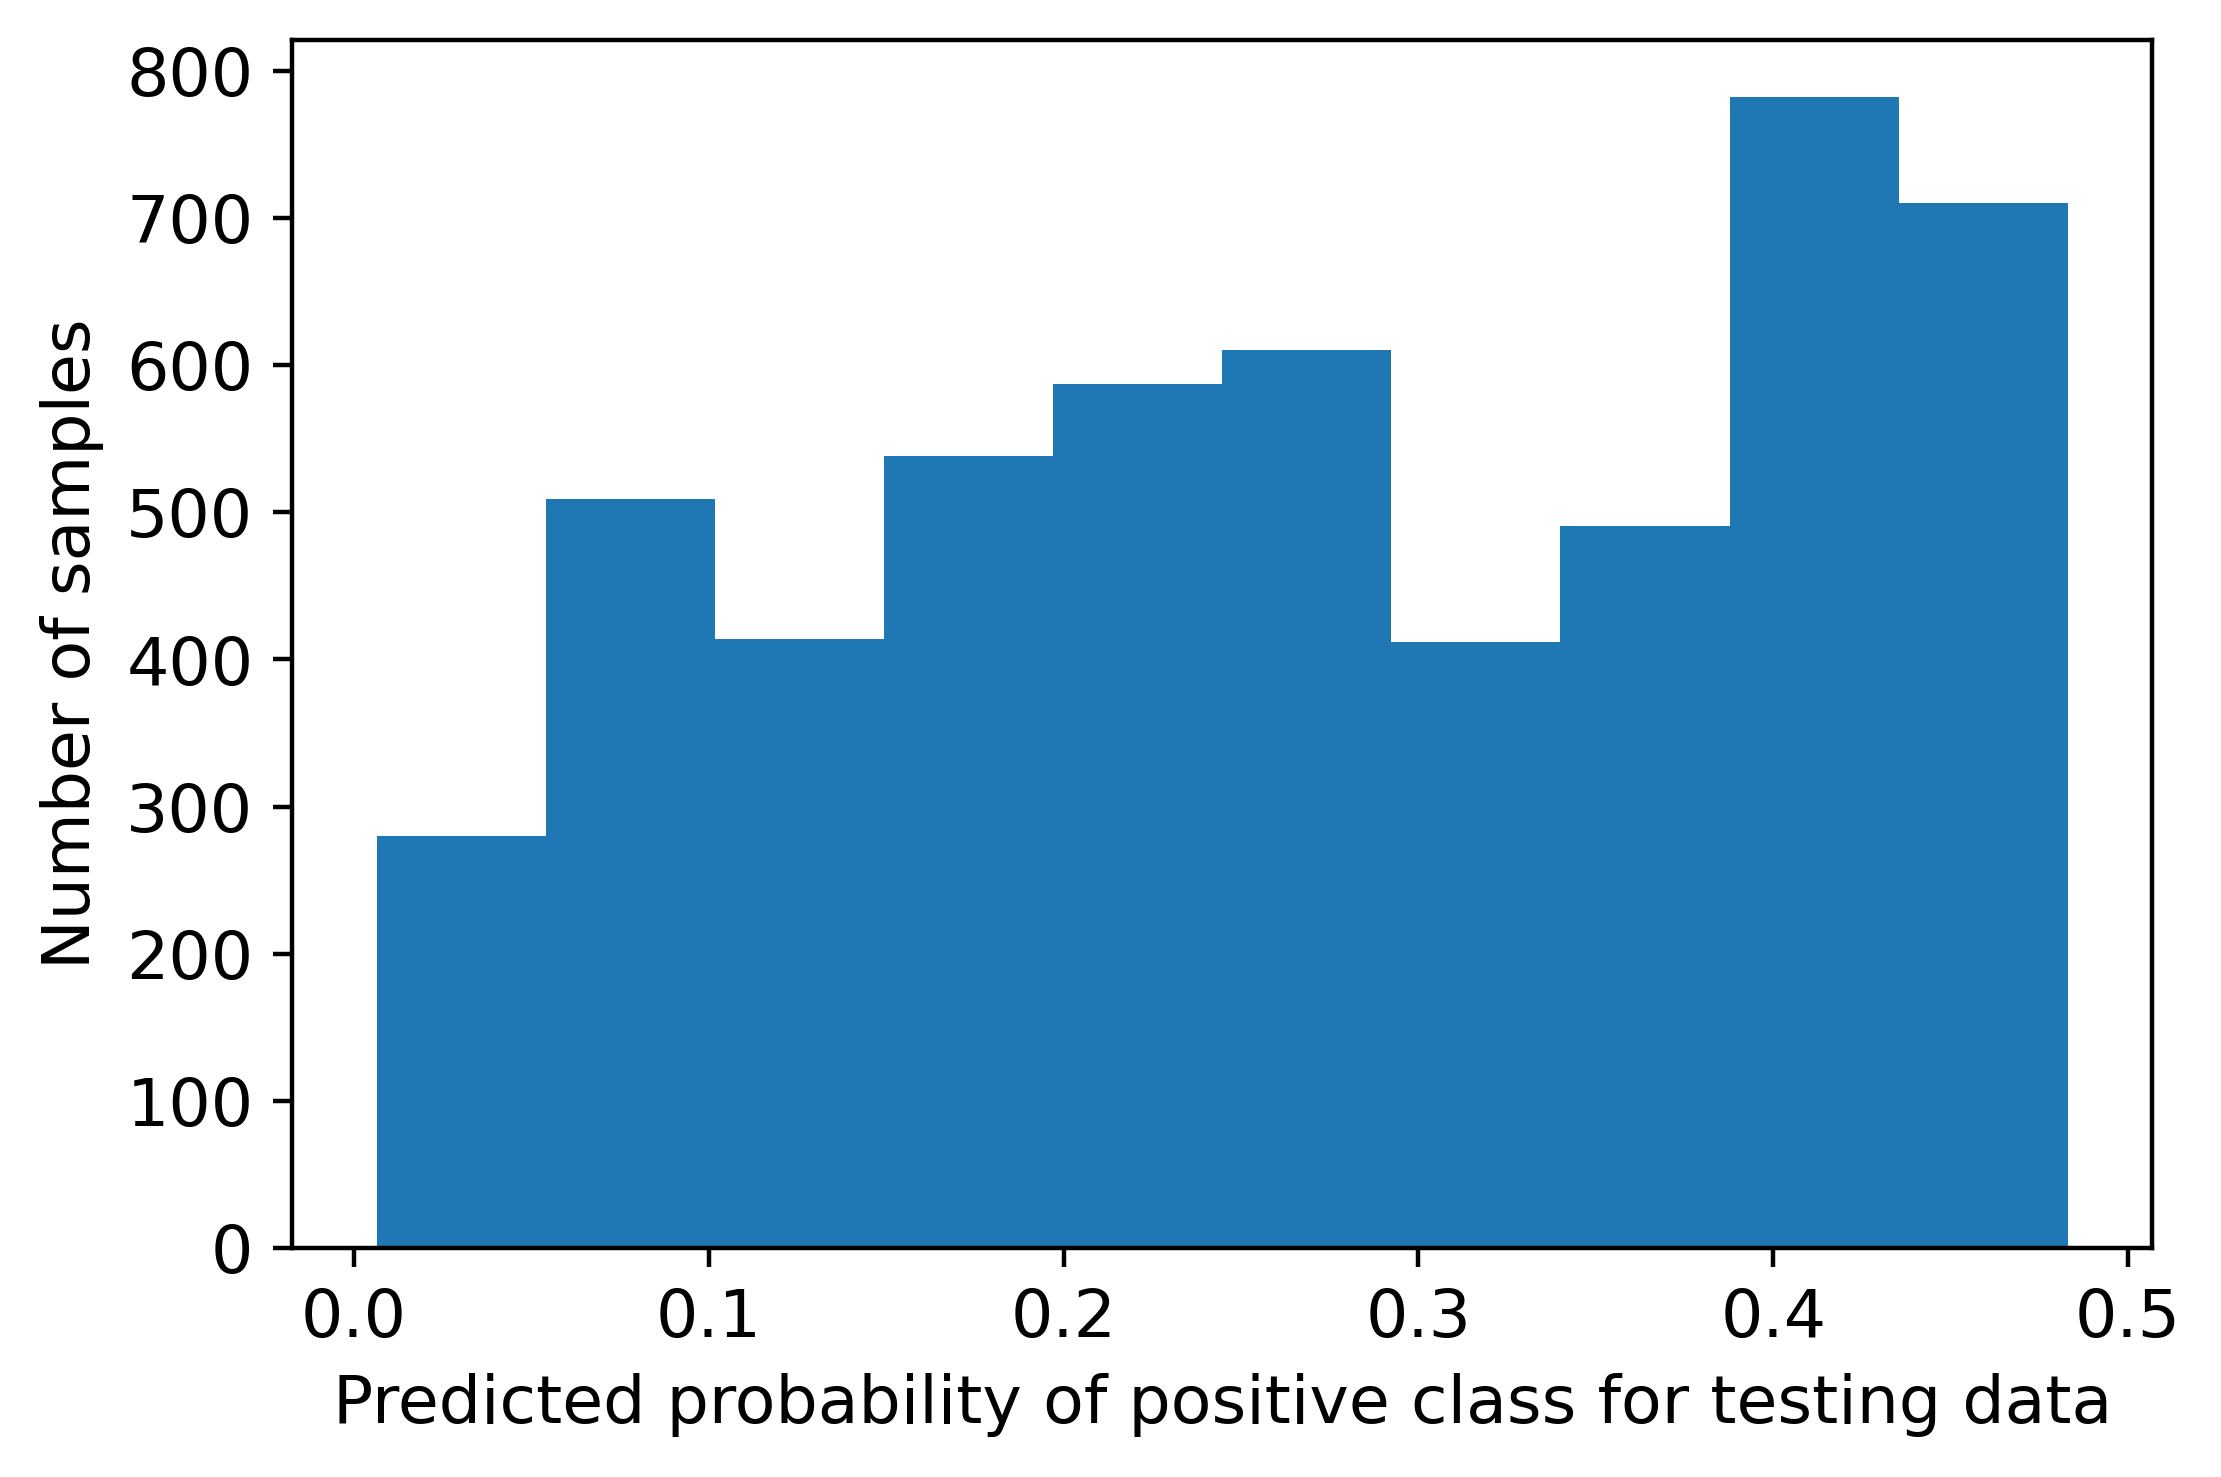

In [45]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [46]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

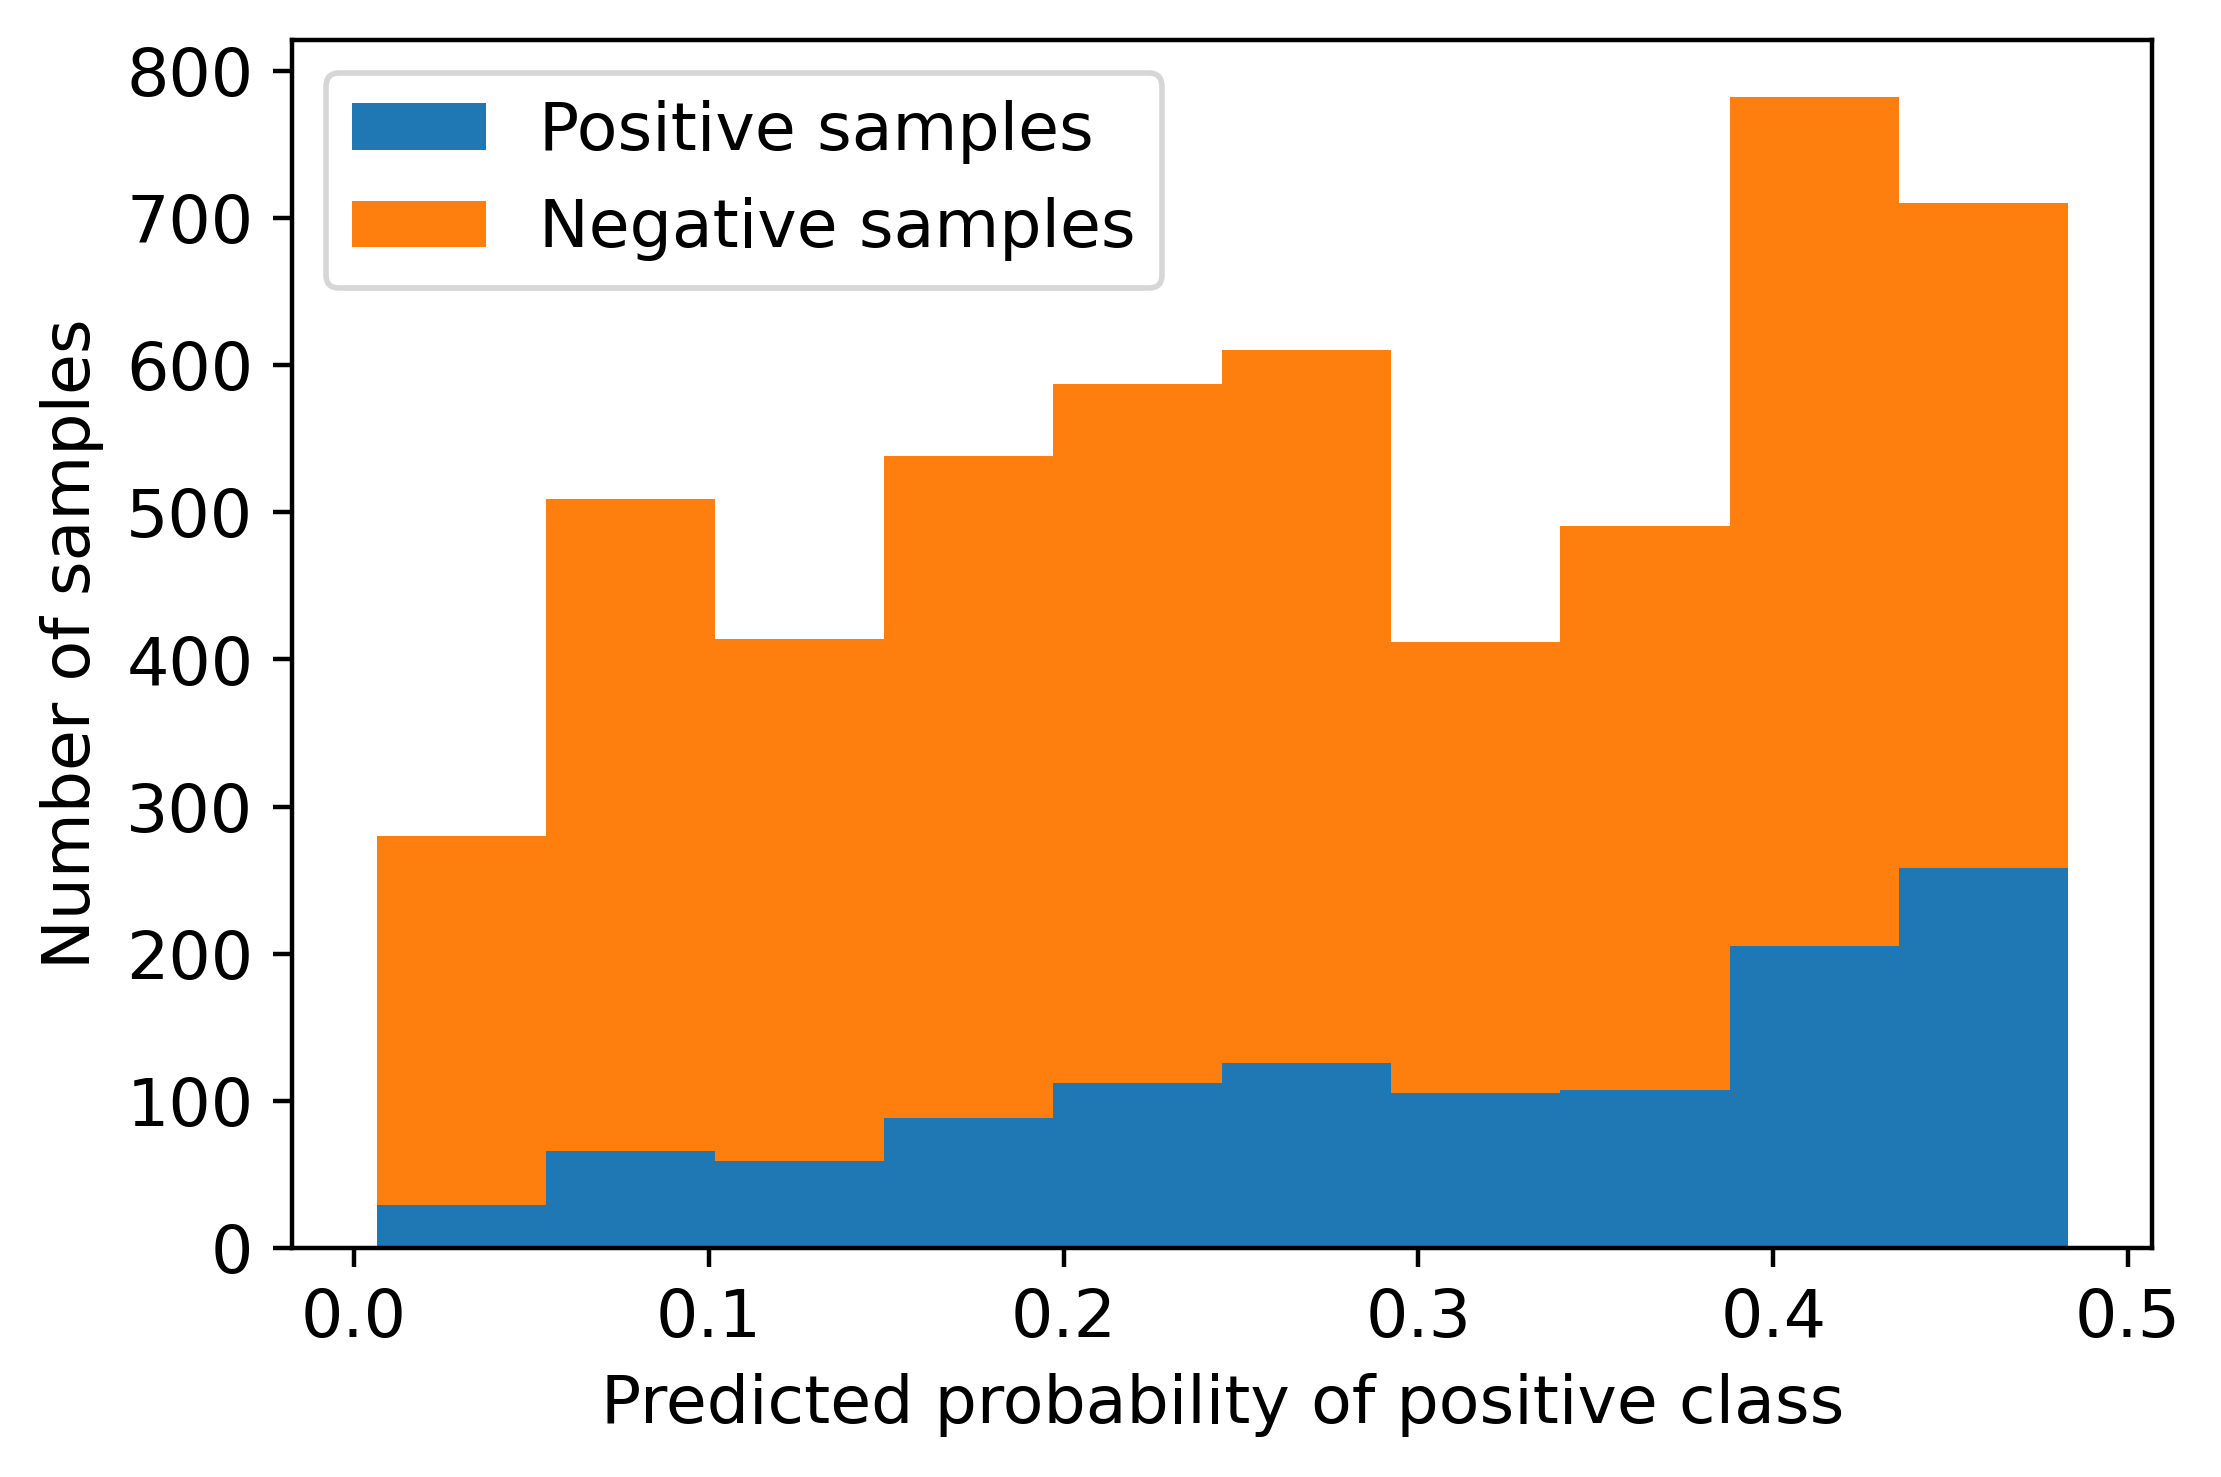

In [47]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

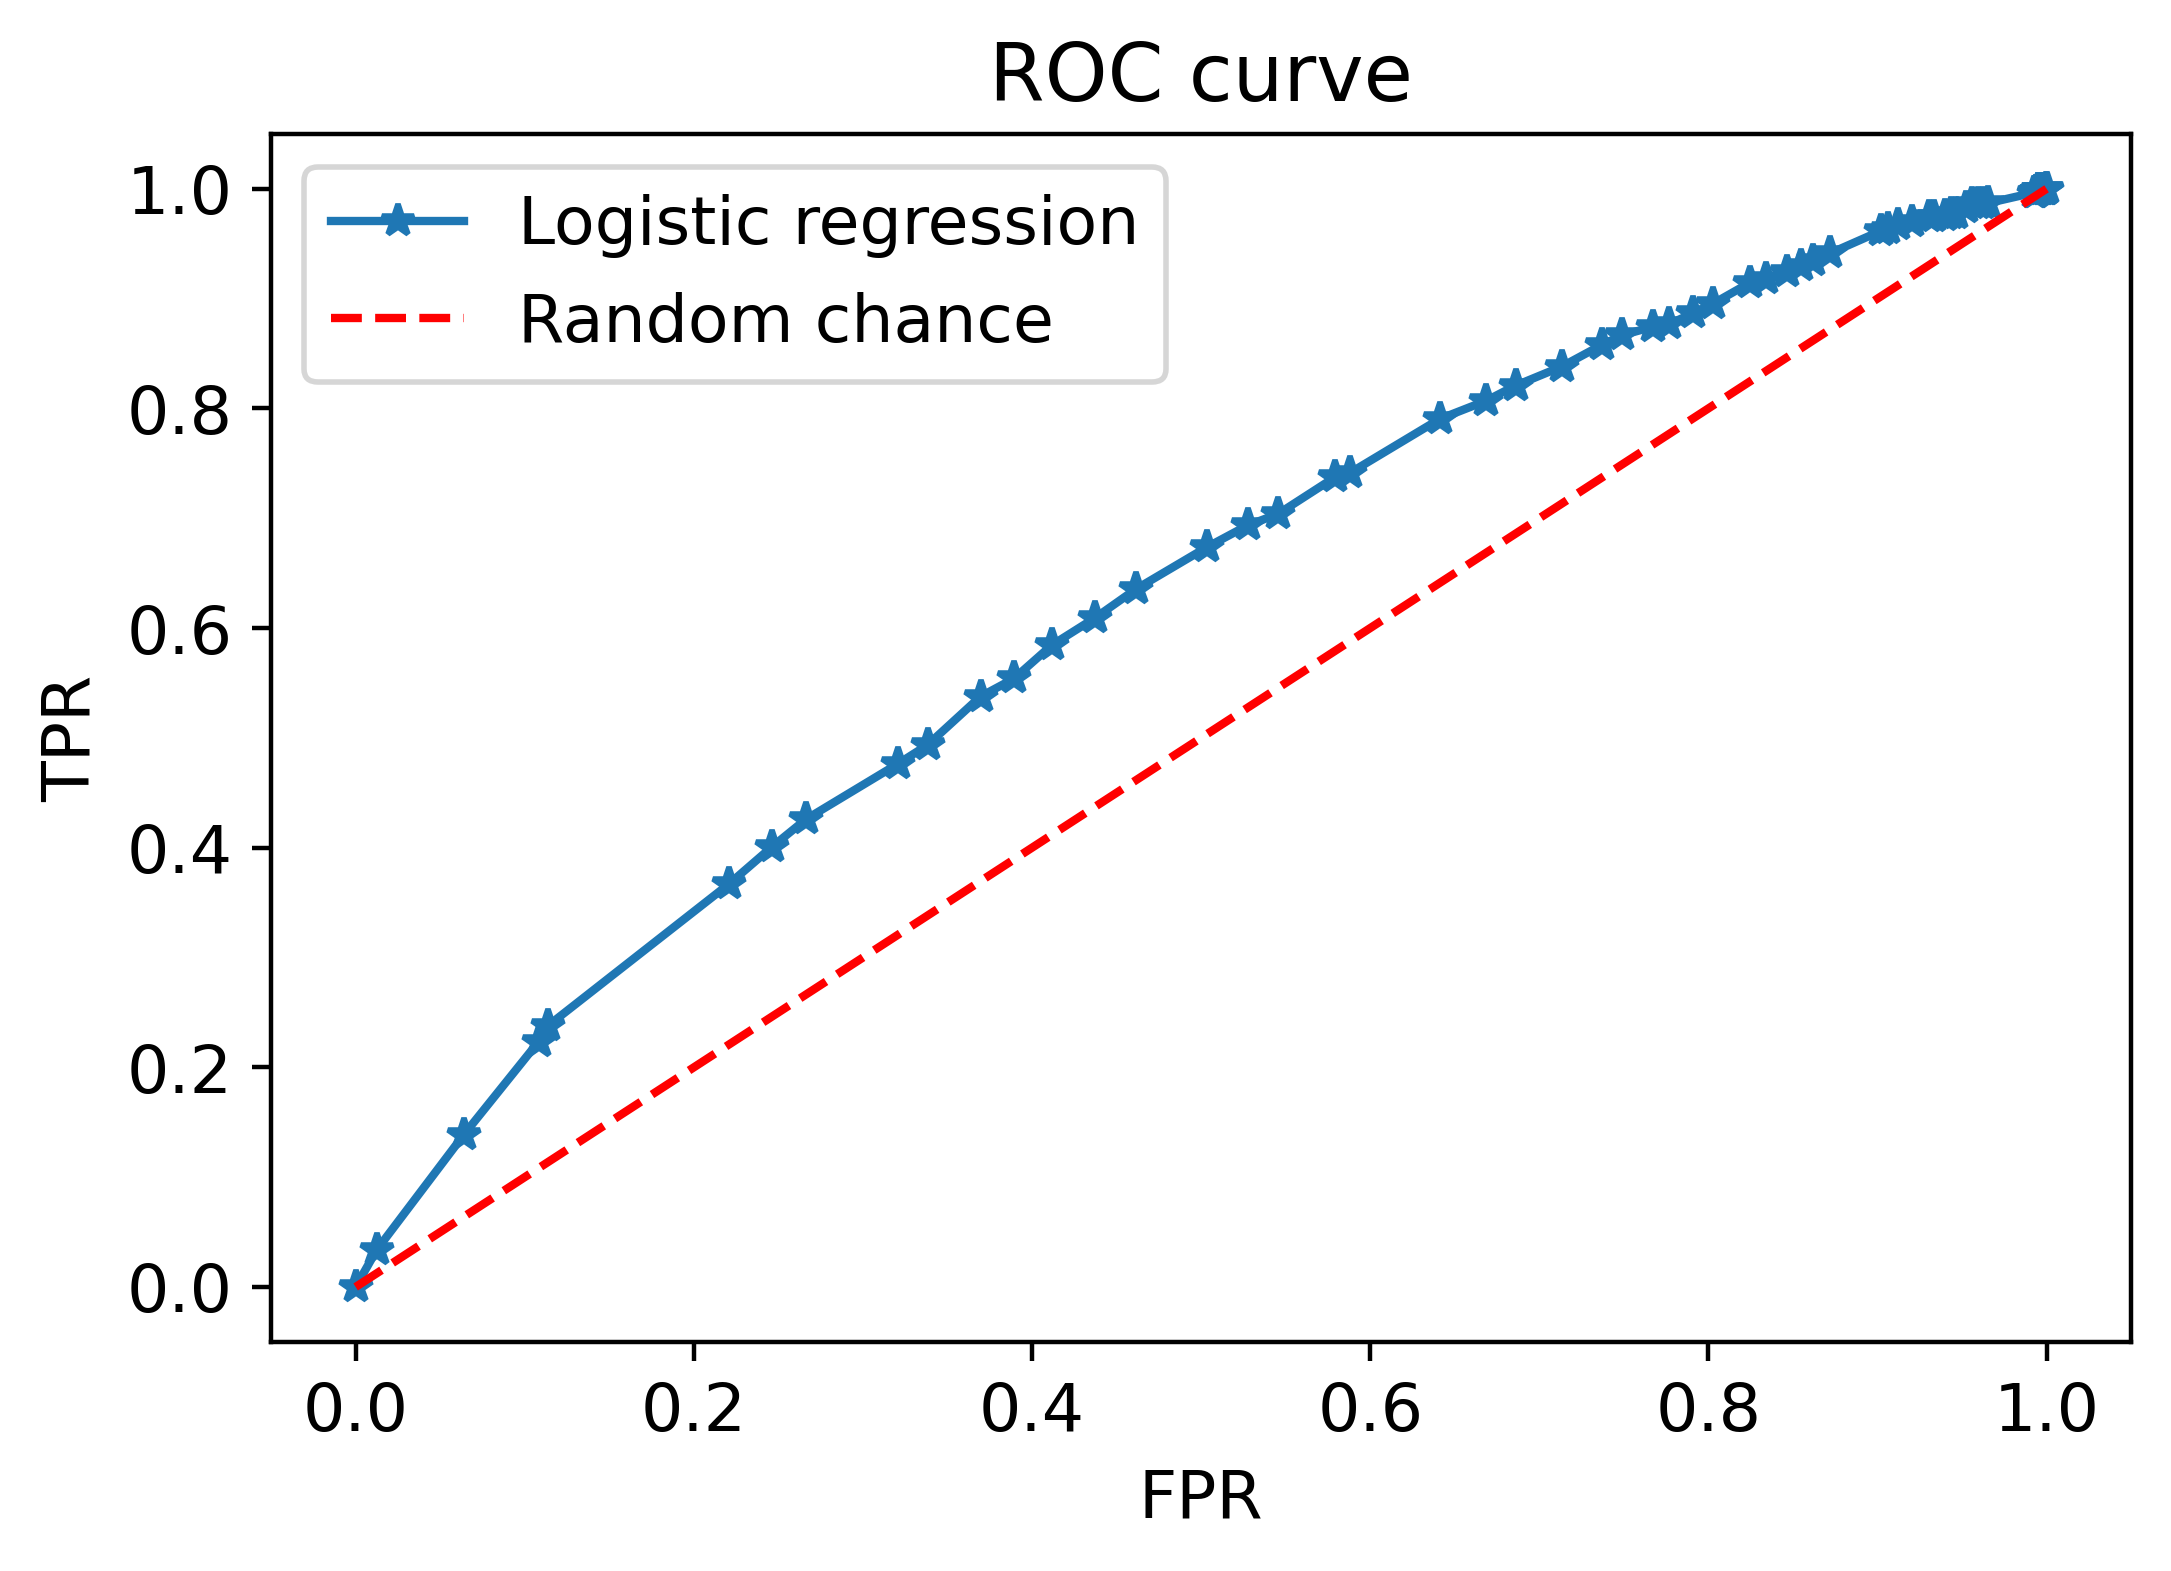

In [49]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [50]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [51]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [52]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21661665 0.21651032 0.21663225 0.21667293 0.21671362 0.21687653
 0.21695807 0.21712135 0.21724398 0.21728488 0.2173258  0.21715363
 0.21719457 0.21704695 0.21716981 0.21725179 0.22033243 0.22073643
 0.22129396 0.22189753 0.22198318 0.22200354 0.22244133 0.22283792
 0.22392516 0.22441652 0.22553363 0.22670997 0.22714286 0.22761729
 0.22985832 0.2305063  0.23116659 0.231755   0.23327465 0.23466667
 0.23569638 0.23654424 0.23784926 0.23956357 0.24237288 0.24342913
 0.24518744 0.24855794 0.25020134 0.25417595 0.25845411 0.26031164
 0.26293661 0.26655574 0.27004512 0.27573253 0.27804107 0.28183716
 0.28231142 0.28683603 0.28744327 0.29115934 0.30654206 0.31032172
 0.31477357 0.36617843 0.36338028 0.37470726 0.42857143 1.        ] [1.         0.9991342  0.9991342  0.9991342  0.9991342  0.9991342
 0.9991342  0.9991342  0.9991342  0.9991342  0.9991342  0.9974026
 0.9974026  0.9965368  0.9965368  0.9965368  0.98701299 0.98614719
 0.98614719 0.98614719 0.98268398 0.97662338 0.97662338 0.97489

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


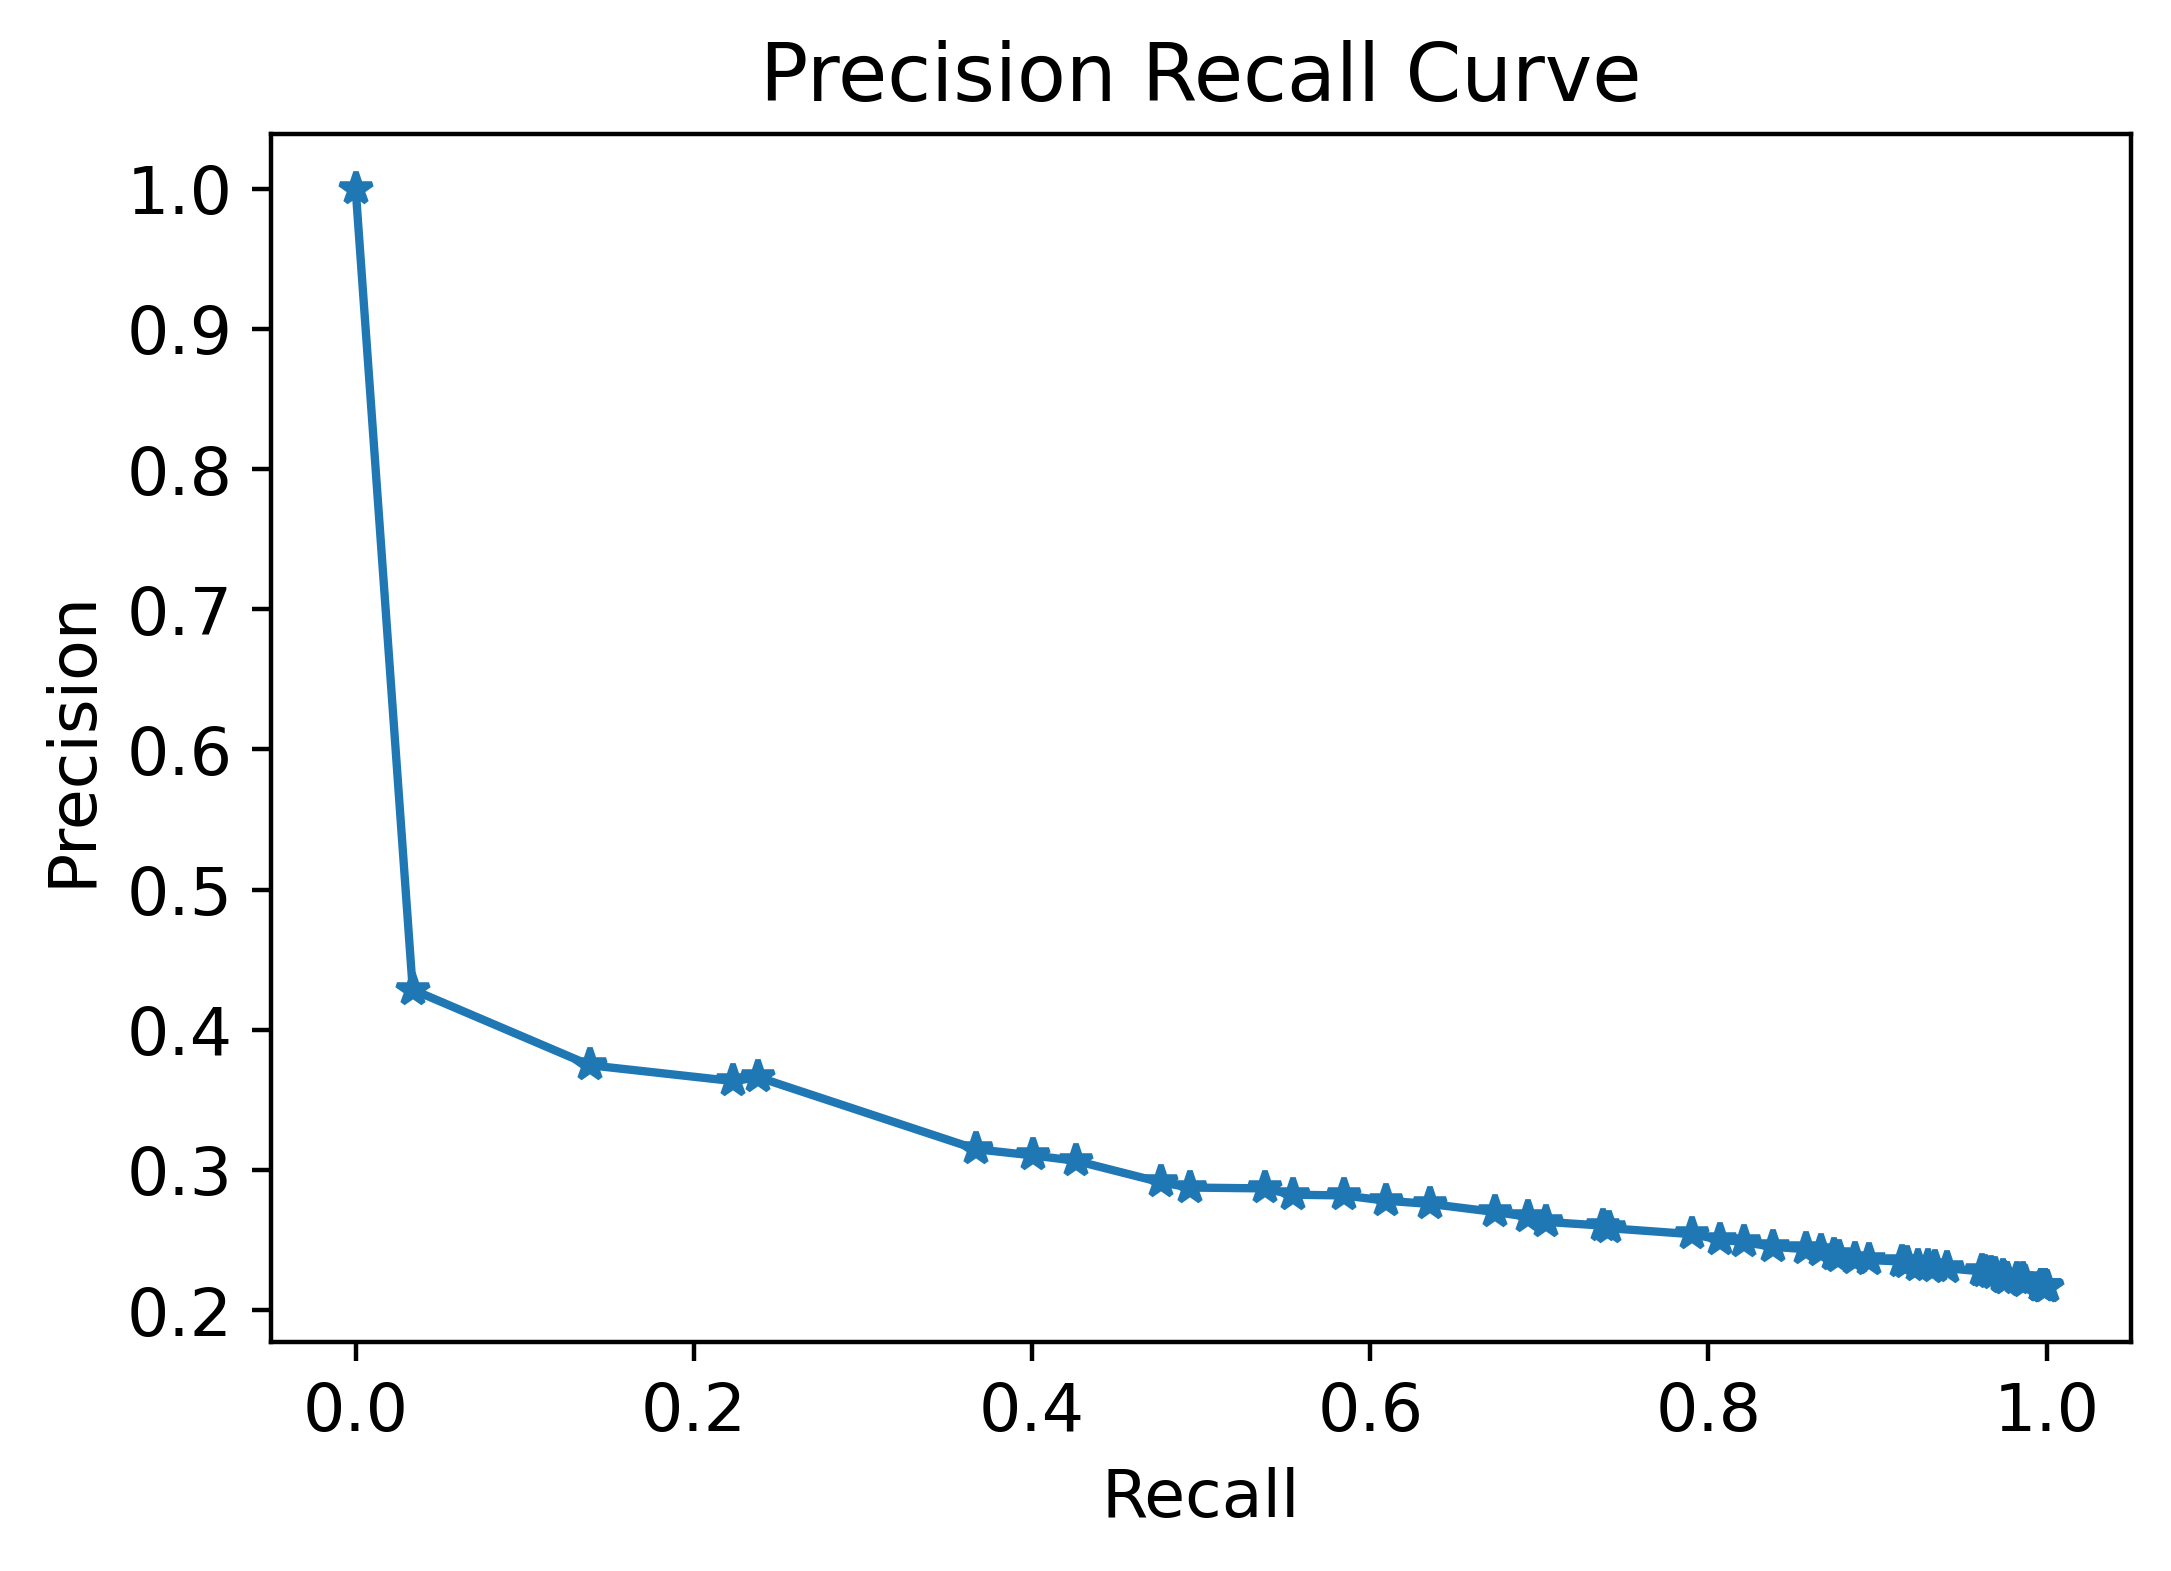

In [53]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [54]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [55]:
#getting training samples
y_train_prob = example_lr.predict_proba(X_train)

#get +ve probs
train_pos_prob = y_train_prob[:,1]

#getting required parameters
fpr,tpr,thresholds = metrics.roc_curve(y_train, train_pos_prob)

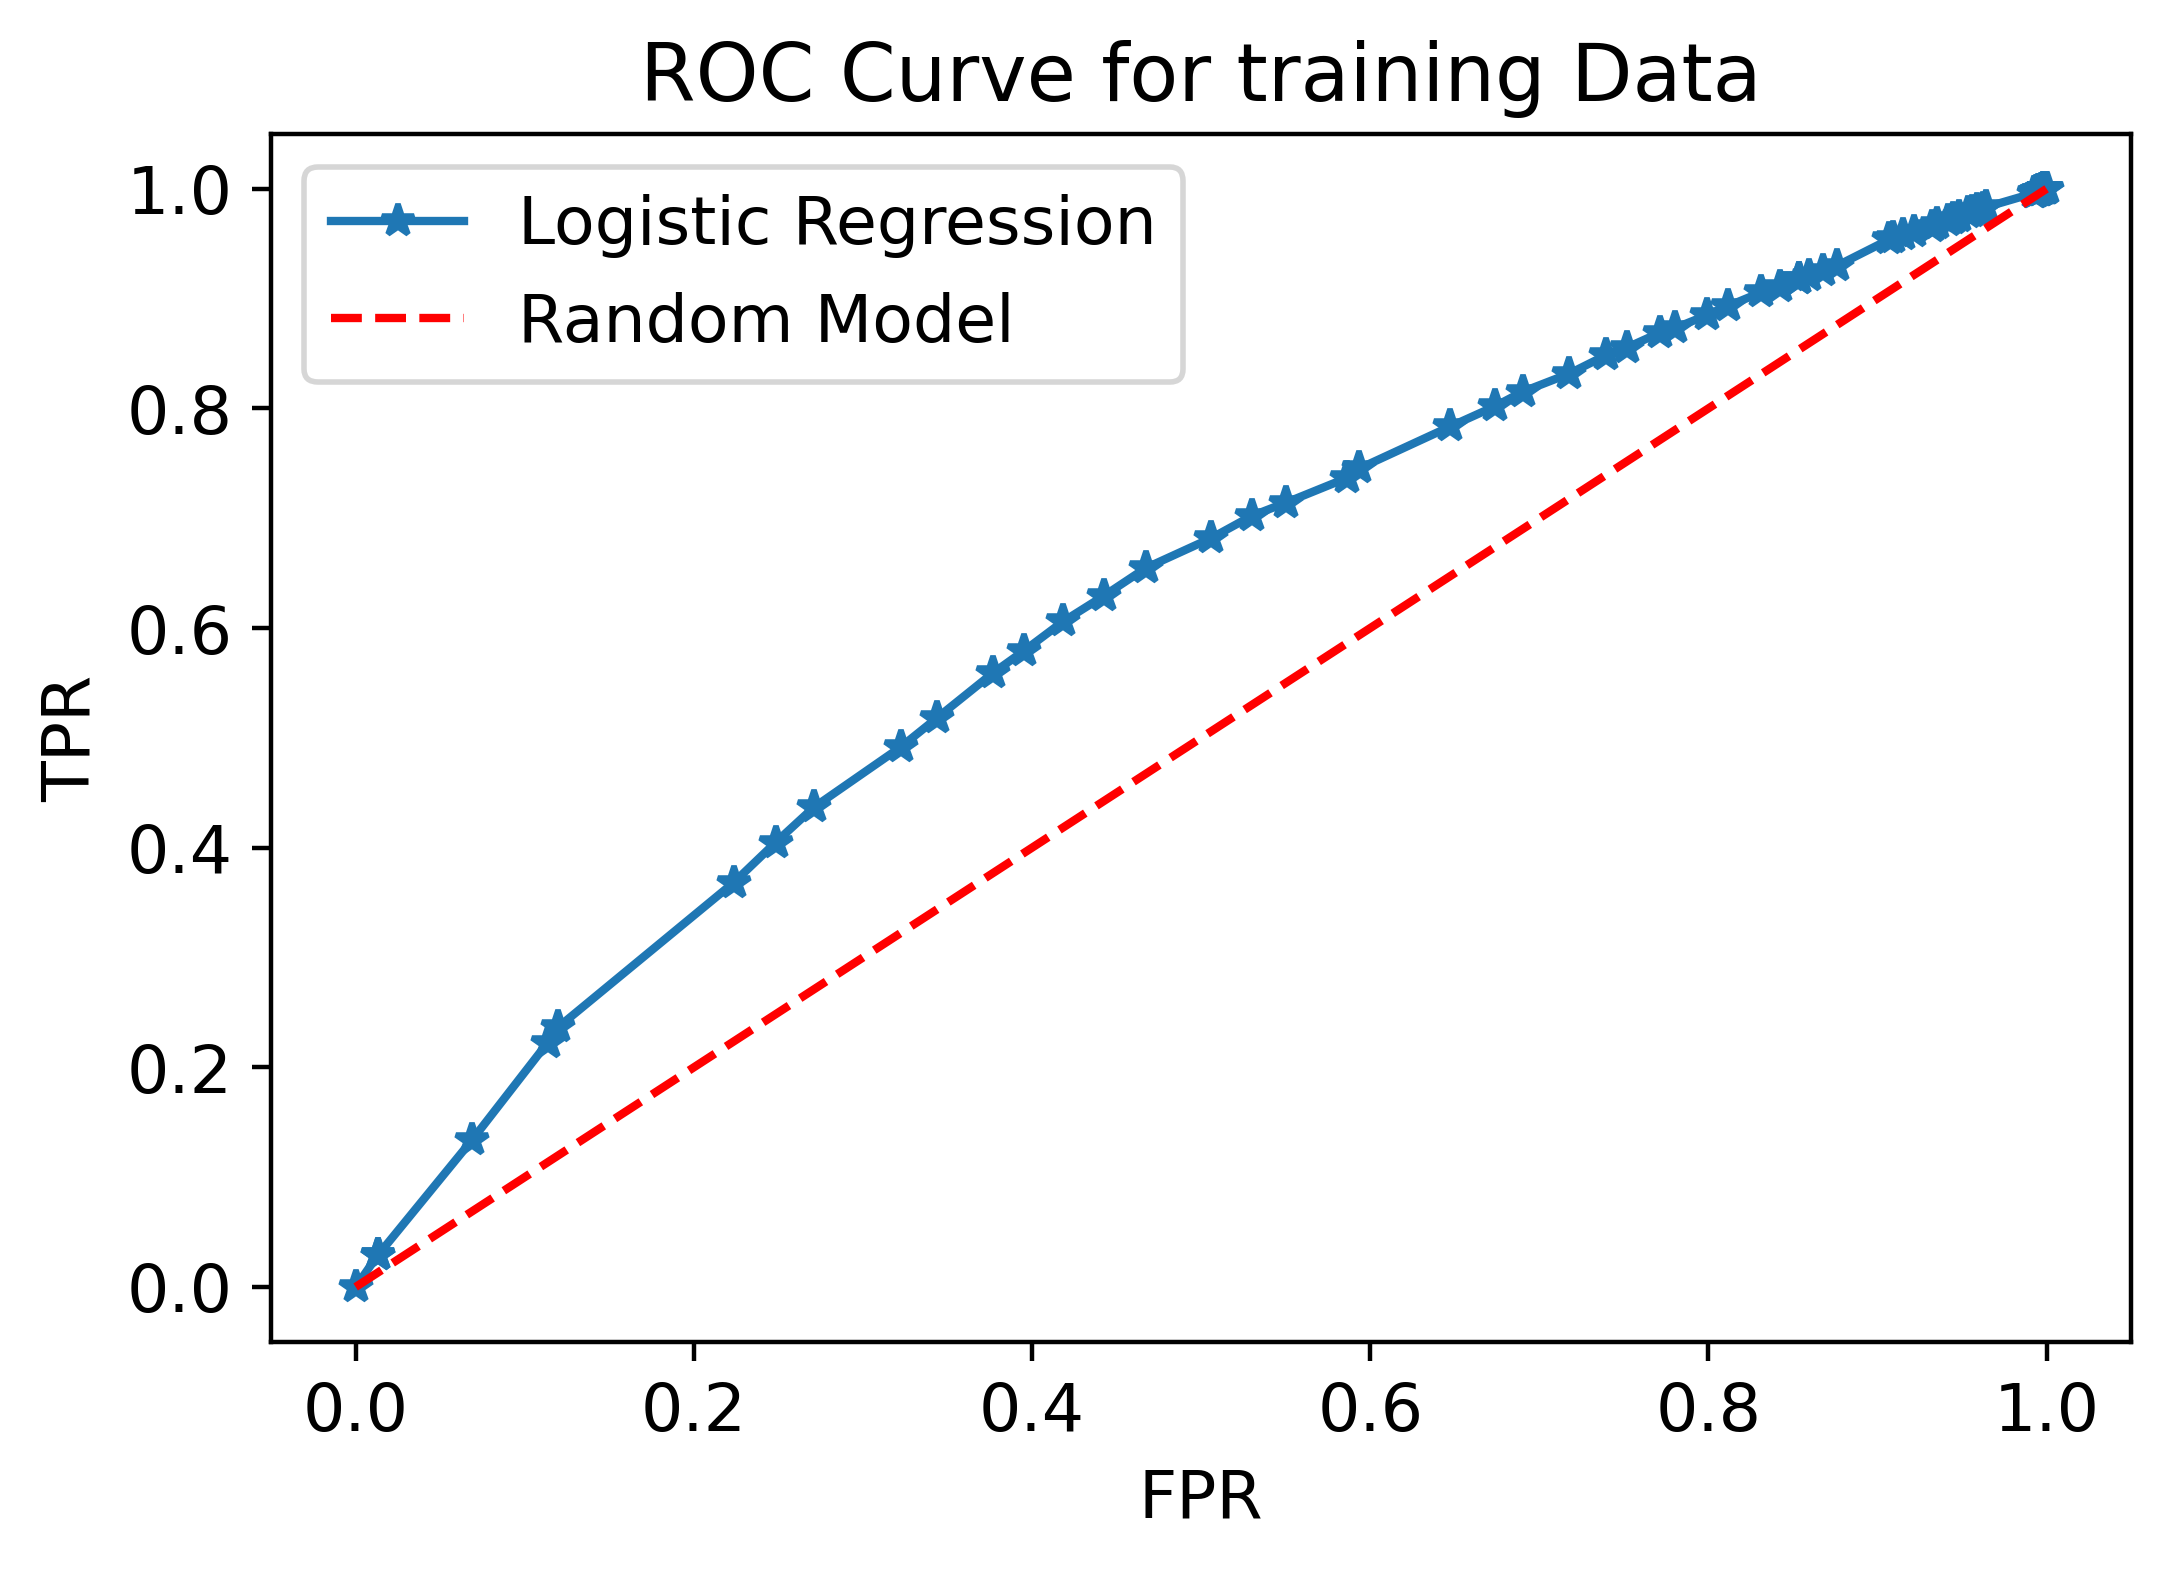

In [56]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression','Random Model'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training Data')
plt.show()

In [57]:
metrics.roc_auc_score(y_train, train_pos_prob)

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
